# Gradientenabstiegsverfahren
**Pakete laden**

In [1]:
# interaktive Ploterstellung
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0
#plt.style.use('seaborn-whitegrid')

**Aufgabe**<br>

0) Versuchen Sie das Gradientabstiegsverfahren umzusetzen ode rzumindest nachzuvollziehn

1) Stellen sie die Lernrate lr auf 0.2 und erklären den resultierenden Effekt (schauen Sie sich hierzu insbesondere die Veränderung der Gewichte w in der Struktur "out" über den Zeitablauf der epochen an.

2) Stellen Sie die Lernrate so ein, dass das Gradientenabstiegsverfahren erfolgreich ist.

3) Versuchen Sie die Lernrate so einzustellen, dass schnellstmögliche Konvergenz eintritt.

**Daten laden**

In [2]:
data = pd.read_excel('Daten.xlsx')

**Darstellung des Zusammenhangs**

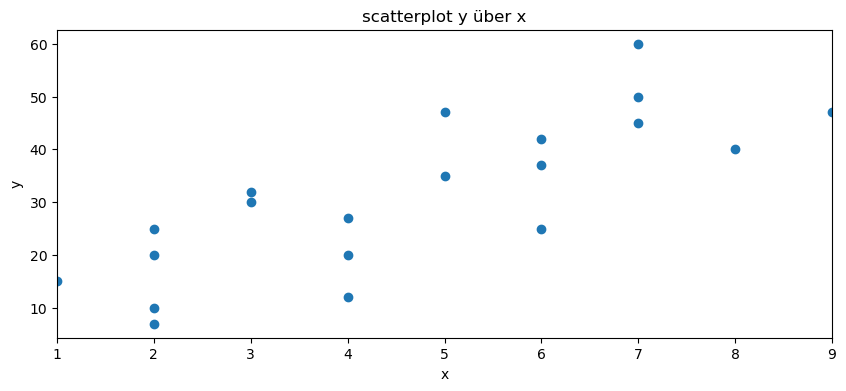

In [3]:
fig, ax =plt.subplots(**{'figsize': (10, 4)})
lin1=ax.scatter(data["x"],data["y"])
ax.set(ylabel="y",xlabel="x",title = "scatterplot y über x");

**Modelhypothese**<br>
es wird ein linearer Zusammenhang zwischen x und y vermutet: $y=w_0+w_1x$


In [4]:
# Vorbereitung des Tensors zur Abbildung der beiden Terme w0 und w1
X = np.column_stack((np.ones(len(data)),data["x"].values))
X.shape

(20, 2)

**Parametrierung des Gradientenabstiegsverfahrens**

In [5]:
# Anzahl der Epochen um das Netz zu lernen
epoch = 6000
# Lernrate zum Update der Gewichte
lr = 0.002;

**Gradientenabstigesverfahren**

In [6]:
# Lösung
# Initialisierung 
netto = np.zeros((len(data),epoch))
J = np.zeros(epoch-1)
w  = np.zeros((2,epoch))
g  = np.zeros_like(w)
aktiv  = np.zeros_like(netto)
error  = np.zeros_like(netto)

# Update der Gradienten
for i in range(epoch-1):
    
    # Berechnung der Nettoeingabe
     netto[:,i]= w[:,i]@X.T
        
    #Berechnung der Aktivierung
     aktiv[:,i] = netto[:,i] 
        
    # Fehler
     error[:,i] =data["y"] - aktiv[:,i]
        
    # Zielfunktion
     J[i] = .5 * np.sum(error[:,i]**2)
     g[:,i]=-np.dot(error[:,i],X);
     w[:,i+1]= w[:,i] - lr*g[:,i];   

<details>
    <summary>Click here to see a <strong>solution</strong>.</summary>

```python
# Initialisierung 
netto = np.zeros((len(data),epoch))
J = np.zeros(epoch-1)
w  = np.zeros((2,epoch))
g  = np.zeros_like(w)
aktiv  = np.zeros_like(netto)
error  = np.zeros_like(netto)

# Update der Gradienten
for i in range(epoch-1):
    
    # Berechnung der Nettoeingabe
     netto[:,i]= w[:,i]@X.T
        
    #Berechnung der Aktivierung
     aktiv[:,i] = netto[:,i] 
        
    # Fehler
     error[:,i] =data["y"] - aktiv[:,i]
        
    # Zielfunktion
     J[i] = .5 * np.sum(error[:,i]**2)
     g[:,i]=-np.dot(error[:,i],X);
     w[:,i+1]= w[:,i] - lr*g[:,i];   
```

</details>

**Zusammenfassung der Elemente in einem pandas DataFrame**

In [7]:
out =pd.DataFrame(np.column_stack((J,g[:,:-1].T,w[:,:-1].T)),columns=["Loss","gradient bias","gradient slope","weight1","weight2"])
out

,Loss,gradient bias,gradient slope,weight1,weight2
0,11861.000000,-6.260000e+02,-3.423000e+03,0.000000,0.000000
1,946.432210,3.571800e+01,3.423540e+02,1.252000,6.846000
2,839.009932,-2.938856e+01,-2.923891e+01,1.180564,6.161292
3,836.838271,-2.277458e+01,7.396041e+00,1.239341,6.219770
4,835.707903,-2.323926e+01,3.747934e+00,1.284890,6.204978
...,...,...,...,...,...
5994,760.040278,-2.149392e-13,1.847411e-13,7.617603,5.092989
5995,760.040278,-2.149392e-13,1.847411e-13,7.617603,5.092989
5996,760.040278,-2.149392e-13,1.847411e-13,7.617603,5.092989
5997,760.040278,-2.149392e-13,1.847411e-13,7.617603,5.092989


**Darstellung Verlauf der Verlustfunktion**

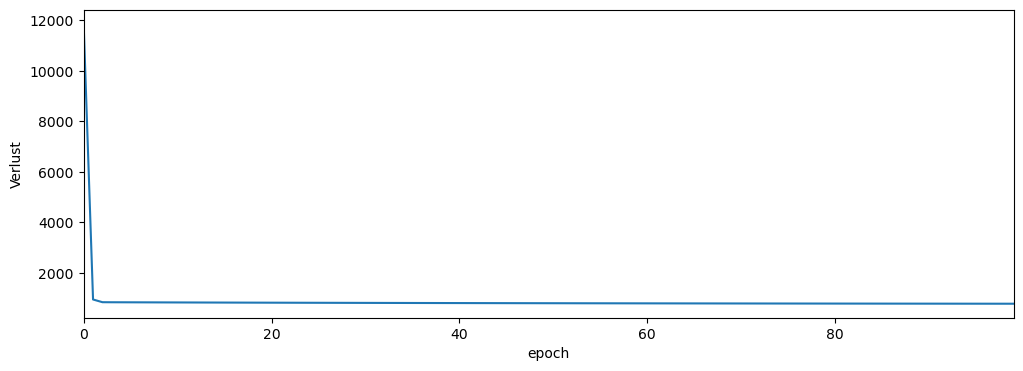

In [8]:
fig, ax =plt.subplots(**{'figsize': (12, 4)})
lin1=ax.plot(list(range(100)),J[:100],label="Verlustfunktion")
ax.set(ylabel="Verlust",xlabel="epoch");

**Darstellung des Fittings mit finalen Parametern**

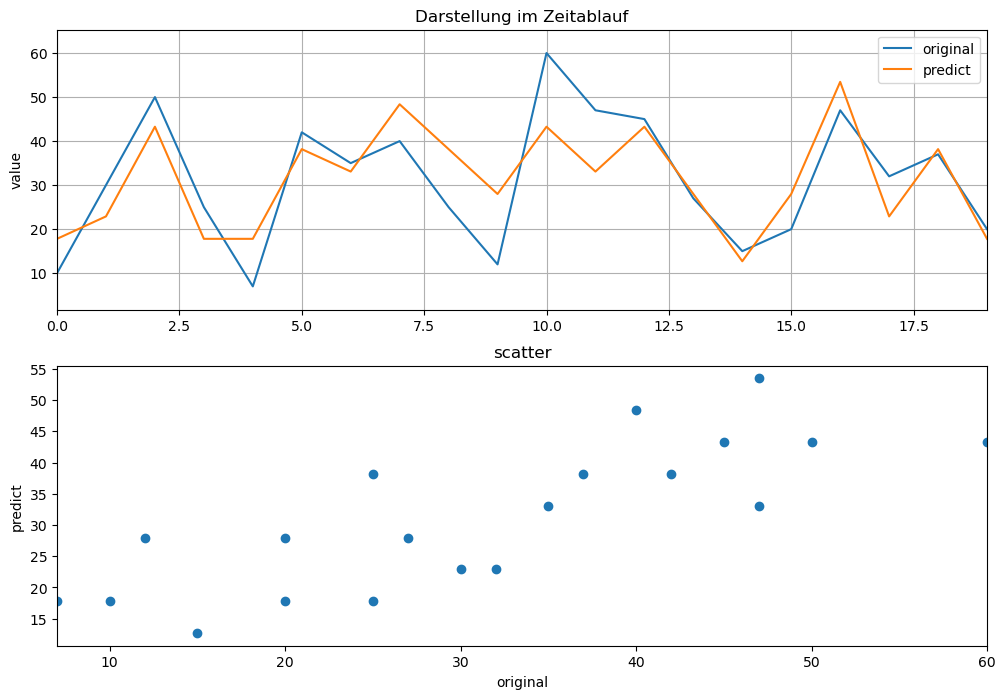

In [9]:
YPred = w[:,-1]@X.T
fig, ax =plt.subplots(nrows=2,ncols=1,**{'figsize': (12, 8)})
lin1=ax[0].plot(data.index,data["y"],label="original")
lin2=ax[0].plot(data.index,YPred,label="predict")
ax[0].set(ylabel="value",title='Darstellung im Zeitablauf')
ax[0].grid()
ax[0].margins(0,.1)
ax[0].legend();
lin3=ax[1].scatter(data["y"],YPred)
ax[1].set(ylabel="predict",xlabel="original",title='scatter');

**Darstellung der gefundenen Gewichte**

In [10]:
w[:,-1]

array([7.61760318, 5.09298856])

**Weg der Verlustfunktion in Abhängigkeit der angepassten Gewichte**

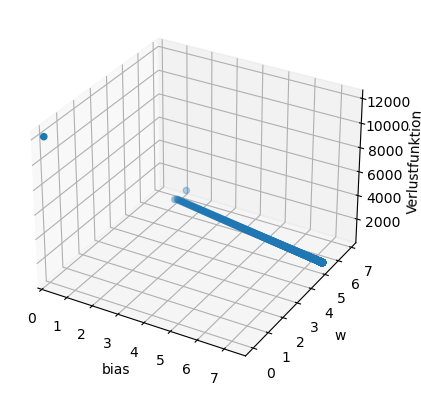

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
lin=ax.scatter(w[0,:-1],w[1,:-1], J, zdir='z')
ax.set(xlabel='bias',ylabel='w',zlabel="Verlustfunktion");